In [11]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import integrate as itg
from matplotlib import pyplot as plt
sunny_1 = pd.read_csv('C:\Users\Sunny\Documents\signals_project\sunny_1.csv', header=0)
sunny_2 = pd.read_csv('C:\Users\Sunny\Documents\signals_project\sunny_2.csv', header=0)
sam_1 = pd.read_csv('C:\Users\Sunny\Documents\signals_project\sam_1.csv', header=0)
sam_2 = pd.read_csv('C:\Users\Sunny\Documents\signals_project\sam_2.csv', header=0)
vince_1 = pd.read_csv('C:\Users\Sunny\Documents\signals_project\shadbolt_1.csv', header=0)

del sunny_1['Unnamed: 7']
del sunny_2['Unnamed: 7']
del sam_1['Unnamed: 7']
del sam_2['Latitude']
del sam_2['Longitude']
del sam_2['Unnamed: 9']
del vince_1['Unnamed: 7']

In [18]:
sunny_1_int1 = pd.DataFrame(columns=['time','ax_1','ay_1','az_1','wx_1','wy_1','wz_1'])
sunny_2_int1 = pd.DataFrame(columns=['time','ax_1','ay_1','az_1','wx_1','wy_1','wz_1'])
sam_1_int1 = pd.DataFrame(columns=['time','ax_1','ay_1','az_1','wx_1','wy_1','wz_1'])
sam_2_int1 = pd.DataFrame(columns=['time','ax_1','ay_1','az_1','wx_1','wy_1','wz_1'])
vince_1_int1 = pd.DataFrame(columns=['time','ax_1','ay_1','az_1','wx_1','wy_1','wz_1'])

sunny_1_int2 = pd.DataFrame(columns=['time','ax_2','ay_2','az_2','wx_2','wy_2','wz_2'])
sunny_2_int2 = pd.DataFrame(columns=['time','ax_2','ay_2','az_2','wx_2','wy_2','wz_2'])
sam_1_int2 = pd.DataFrame(columns=['time','ax_2','ay_2','az_2','wx_2','wy_2','wz_2'])
sam_2_int2 = pd.DataFrame(columns=['time','ax_2','ay_2','az_2','wx_2','wy_2','wz_2'])
vince_1_int2 = pd.DataFrame(columns=['time','ax_2','ay_2','az_2','wx_2','wy_2','wz_2'])

avg = pd.DataFrame(columns=['ax','ay','az','wx','wy','wz','ax_1','ay_1','az_1','wx_1','wy_1','wz_1','ax_2','ay_2','az_2','wx_2','wy_2','wz_2'], 
                      index=['sunny_1', 'sunny_2', 'sam_1','sam_2', 'vince_1'])
maxs = pd.DataFrame(columns=['ax','ay','az','wx','wy','wz','ax_1','ay_1','az_1','wx_1','wy_1','wz_1','ax_2','ay_2','az_2','wx_2','wy_2','wz_2'], 
                      index=['sunny_1', 'sunny_2', 'sam_1','sam_2', 'vince_1'])

In [19]:
# first integration
for _dir in ['x', 'y', 'z']:
    for _type in ['a', 'w']:
        sunny_1_int1['{}{}_1'.format(_type, _dir)] = itg.cumtrapz(sunny_1['{}{}'.format(_type, _dir)], sunny_1['time'])
        sunny_1_int1['time'] = sunny_1['time']
        sunny_2_int1['{}{}_1'.format(_type, _dir)] = itg.cumtrapz(sunny_2['{}{}'.format(_type, _dir)], sunny_2['time'])
        sunny_2_int1['time'] = sunny_2['time']
        
        sam_1_int1['{}{}_1'.format(_type, _dir)] = itg.cumtrapz(sam_1['{}{}'.format(_type, _dir)], sam_1['time'])
        sam_1_int1['time'] = sam_1['time']
        sam_2_int1['{}{}_1'.format(_type, _dir)] = itg.cumtrapz(sam_2['{}{}'.format(_type, _dir)], sam_2['time'])
        sam_2_int1['time'] = sam_2['time']
        
        vince_1_int1['{}{}_1'.format(_type, _dir)] = itg.cumtrapz(vince_1['{}{}'.format(_type, _dir)], vince_1['time'])
        vince_1_int1['time'] = vince_1['time']

In [20]:
# second integration
for _dir in ['x', 'y', 'z']:
    for _type in ['a', 'w']:
        sunny_1_int2['{}{}_2'.format(_type, _dir)] = itg.cumtrapz(sunny_1_int1['{}{}_1'.format(_type, _dir)], sunny_1_int1['time'])
        sunny_1_int2['time'] = sunny_1_int1['time']
        sunny_2_int2['{}{}_2'.format(_type, _dir)] = itg.cumtrapz(sunny_2_int1['{}{}_1'.format(_type, _dir)], sunny_2_int1['time'])
        sunny_2_int2['time'] = sunny_2_int1['time']
        
        sam_1_int2['{}{}_2'.format(_type, _dir)] = itg.cumtrapz(sam_1_int1['{}{}_1'.format(_type, _dir)], sam_1_int1['time'])
        sam_1_int2['time'] = sam_1_int1['time']
        sam_2_int2['{}{}_2'.format(_type, _dir)] = itg.cumtrapz(sam_2_int1['{}{}_1'.format(_type, _dir)], sam_2_int1['time'])
        sam_2_int2['time'] = sam_2_int1['time']
        
        vince_1_int2['{}{}_2'.format(_type, _dir)] = itg.cumtrapz(vince_1_int1['{}{}_1'.format(_type, _dir)], vince_1_int1['time'])
        vince_1_int2['time'] = vince_1_int1['time']

In [100]:
# getting absolute averages and maximums
for _dir in ['x', 'y', 'z']:
    for _type in ['a', 'w']:
        avg.loc['sunny_1', '{}{}'.format(_type, _dir)] = np.mean(np.absolute(sunny_1['{}{}'.format(_type, _dir)]))
        avg.loc['sunny_1', '{}{}_1'.format(_type, _dir)] = np.mean(np.absolute(sunny_1['{}{}_1'.format(_type, _dir)]))
        maxs.loc['sunny_1', '{}{}'.format(_type, _dir)] = np.max(np.absolute(sunny_1['{}{}'.format(_type, _dir)]))
        maxs.loc['sunny_1', '{}{}_1'.format(_type, _dir)] = np.max(np.absolute(sunny_1['{}{}_1'.format(_type, _dir)]))
                                                                 
        avg.loc['sunny_2', '{}{}'.format(_type, _dir)] = np.mean(np.absolute(sunny_2['{}{}'.format(_type, _dir)]))
        avg.loc['sunny_2', '{}{}_1'.format(_type, _dir)] = np.mean(np.absolute(sunny_2['{}{}_1'.format(_type, _dir)]))
        maxs.loc['sunny_2', '{}{}'.format(_type, _dir)] = np.max(np.absolute(sunny_2['{}{}'.format(_type, _dir)]))
        maxs.loc['sunny_2', '{}{}_1'.format(_type, _dir)] = np.max(np.absolute(sunny_2['{}{}_1'.format(_type, _dir)]))
        
        avg.loc['sam_1', '{}{}'.format(_type, _dir)] = np.mean(np.absolute(sam_1['{}{}'.format(_type, _dir)]))
        avg.loc['sam_1', '{}{}_1'.format(_type, _dir)] = np.mean(np.absolute(sam_1['{}{}_1'.format(_type, _dir)]))
        maxs.loc['sam_1', '{}{}'.format(_type, _dir)] = np.max(np.absolute(sam_1['{}{}'.format(_type, _dir)]))
        maxs.loc['sam_1', '{}{}_1'.format(_type, _dir)] = np.max(np.absolute(sam_1['{}{}_1'.format(_type, _dir)]))
        
        avg.loc['sam_2', '{}{}'.format(_type, _dir)] = np.mean(np.absolute(sam_2['{}{}'.format(_type, _dir)]))
        avg.loc['sam_2', '{}{}_1'.format(_type, _dir)] = np.mean(np.absolute(sam_2['{}{}_1'.format(_type, _dir)]))
        maxs.loc['sam_2', '{}{}'.format(_type, _dir)] = np.max(np.absolute(sam_2['{}{}'.format(_type, _dir)]))
        maxs.loc['sam_2', '{}{}_1'.format(_type, _dir)] = np.max(np.absolute(sam_2['{}{}_1'.format(_type, _dir)]))  
        
        avg.loc['vince_1', '{}{}'.format(_type, _dir)] = np.mean(np.absolute(vince_1['{}{}'.format(_type, _dir)]))
        avg.loc['vince_1', '{}{}_1'.format(_type, _dir)] = np.mean(np.absolute(vince_1['{}{}_1'.format(_type, _dir)]))
        maxs.loc['vince_1', '{}{}'.format(_type, _dir)] = np.max(np.absolute(vince_1['{}{}'.format(_type, _dir)]))
        maxs.loc['vince_1', '{}{}_1'.format(_type, _dir)] = np.max(np.absolute(vince_1['{}{}_1'.format(_type, _dir)])) 

In [101]:
avg

,ax,ay,az,wx,wy,wz,ax_1,ay_1,az_1,wx_1,wy_1,wz_1
sunny_1,7.17969,9.40552,5.20617,0.561744,1.5157,2.16695,249.37,318.012,177.596,19.0965,51.1052,73.7419
sunny_2,9.24288,14.0498,5.26878,0.591449,1.81122,2.36571,230.606,317.967,166.331,19.8226,52.3578,75.8299
sam_1,6.12915,7.29382,3.99295,0.691356,1.1995,2.24078,195.084,238.533,132.709,23.1791,40.5617,73.4052
sam_2,6.08905,7.32328,4.37856,0.610956,1.1084,2.25698,231.499,274.399,163.607,23.522,41.0492,85.5171
vince_1,5.42224,7.30827,2.77019,0.53813,0.85717,1.67446,146.496,204.216,75.2999,14.7231,23.4142,47.1502


In [102]:
maxs

,ax,ay,az,wx,wy,wz,ax_1,ay_1,az_1,wx_1,wy_1,wz_1
sunny_1,31.96,51.91,31.35,6.0624,13.3467,9.2891,1488.46,2097.53,1366.83,234.411,577.645,432.805
sunny_2,41.93,67.53,32.86,6.0933,11.2172,9.0132,1488.79,2097.36,1366.2,234.389,577.659,432.854
sam_1,36.4426,29.7787,41.4356,6.4289,15.3142,10.9722,1592.25,1324.5,1619.3,407.316,973.6,697.558
sam_2,40.6236,32.0053,42.2759,5.3934,6.7048,9.1059,2140.56,1760.91,2374.21,242.559,311.565,488.955
vince_1,14.9546,20.6595,16.5748,4.1626,4.1289,7.0239,698.499,719.455,571.297,152.228,192.056,286.526


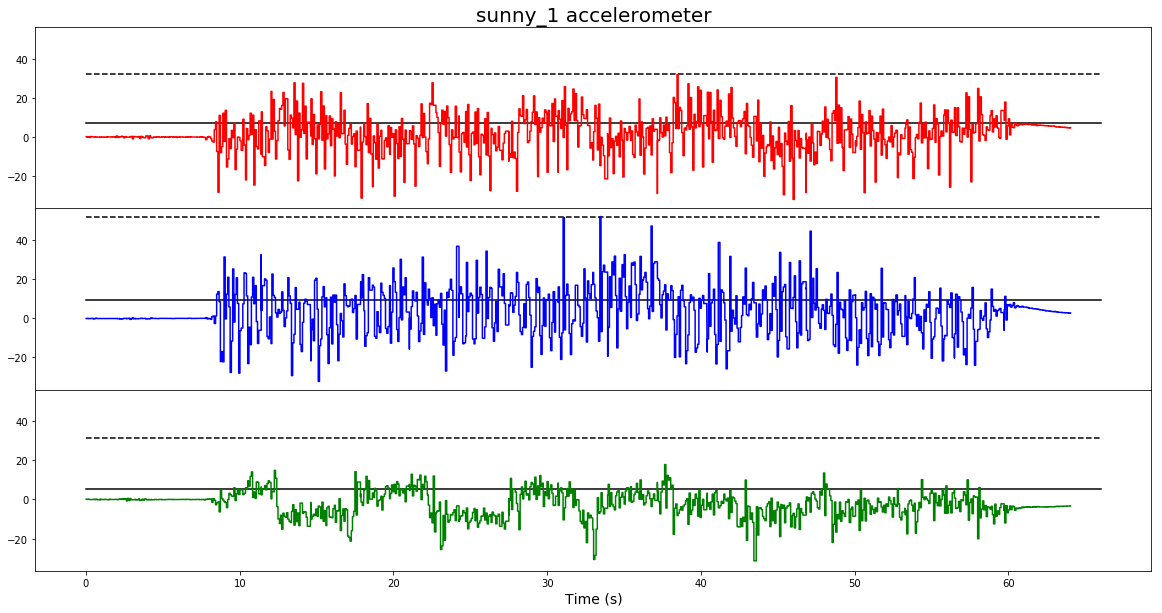

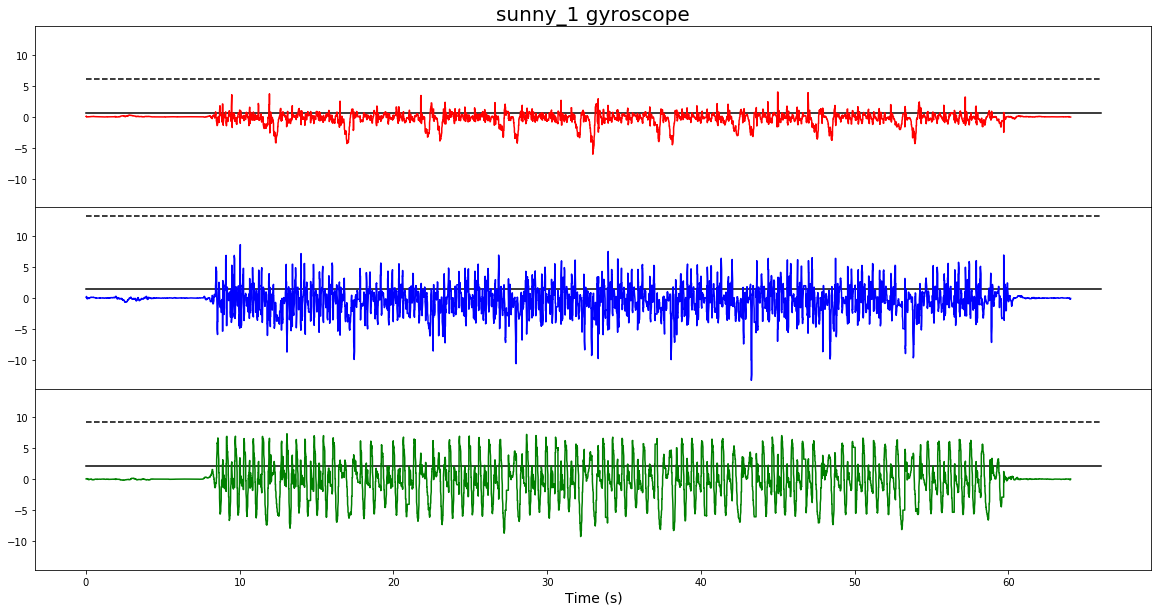

In [87]:
# plot sunny_1
### ACC ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sunny_1':
        ax1.plot((0,66),(row['ax'], row['ax']), 'k-')
        ax2.plot((0,66),(row['ay'], row['ay']), 'k-')
        ax3.plot((0,66),(row['az'], row['az']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sunny_1':
        ax1.plot((0,66),(row['ax'], row['ax']), 'k--')
        ax2.plot((0,66),(row['ay'], row['ay']), 'k--')
        ax3.plot((0,66),(row['az'], row['az']), 'k--')
        
ax1.plot(sunny_1['time'], sunny_1['ax'], 'r-')
ax2.plot(sunny_1['time'], sunny_1['ay'], 'b-')
ax3.plot(sunny_1['time'], sunny_1['az'], 'g-')

# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
ax1.set_title('sunny_1 accelerometer', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

### GYRO ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sunny_1':
        ax1.plot((0,66),(row['wx'], row['wx']), 'k-')
        ax2.plot((0,66),(row['wy'], row['wy']), 'k-')
        ax3.plot((0,66),(row['wz'], row['wz']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sunny_1':
        ax1.plot((0,66),(row['wx'], row['wx']), 'k--')
        ax2.plot((0,66),(row['wy'], row['wy']), 'k--')
        ax3.plot((0,66),(row['wz'], row['wz']), 'k--')

ax1.plot(sunny_1['time'], sunny_1['wx'], 'r-')
ax2.plot(sunny_1['time'], sunny_1['wy'], 'b-')
ax3.plot(sunny_1['time'], sunny_1['wz'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('sunny_1 gyroscope', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

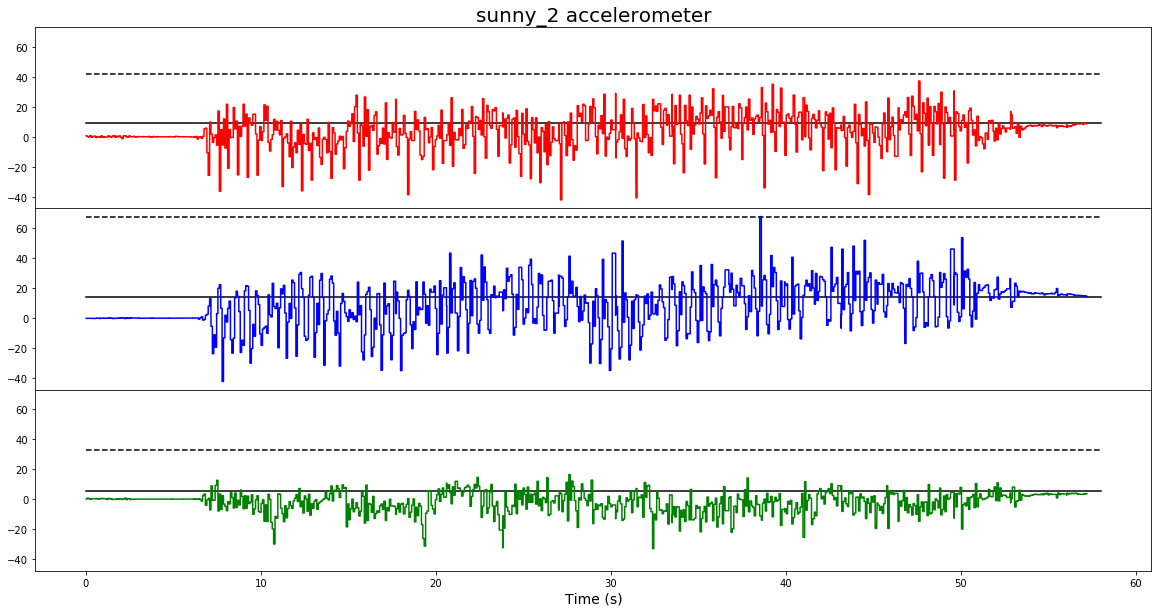

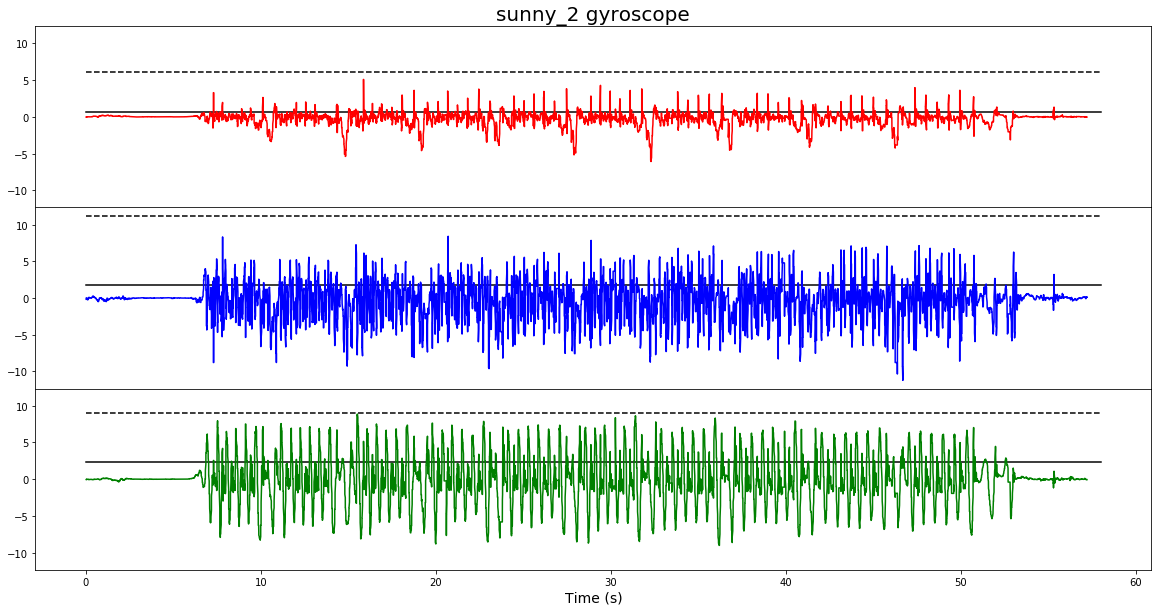

In [89]:
# plot sunny_2
### ACC ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sunny_2':
        ax1.plot((0,58),(row['ax'], row['ax']), 'k-')
        ax2.plot((0,58),(row['ay'], row['ay']), 'k-')
        ax3.plot((0,58),(row['az'], row['az']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sunny_2':
        ax1.plot((0,58),(row['ax'], row['ax']), 'k--')
        ax2.plot((0,58),(row['ay'], row['ay']), 'k--')
        ax3.plot((0,58),(row['az'], row['az']), 'k--')

ax1.plot(sunny_2['time'], sunny_2['ax'], 'r-')
ax2.plot(sunny_2['time'], sunny_2['ay'], 'b-')
ax3.plot(sunny_2['time'], sunny_2['az'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('sunny_2 accelerometer', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

### GYRO ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sunny_2':
        ax1.plot((0,58),(row['wx'], row['wx']), 'k-')
        ax2.plot((0,58),(row['wy'], row['wy']), 'k-')
        ax3.plot((0,58),(row['wz'], row['wz']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sunny_2':
        ax1.plot((0,58),(row['wx'], row['wx']), 'k--')
        ax2.plot((0,58),(row['wy'], row['wy']), 'k--')
        ax3.plot((0,58),(row['wz'], row['wz']), 'k--')

ax1.plot(sunny_2['time'], sunny_2['wx'], 'r-')
ax2.plot(sunny_2['time'], sunny_2['wy'], 'b-')
ax3.plot(sunny_2['time'], sunny_2['wz'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('sunny_2 gyroscope', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

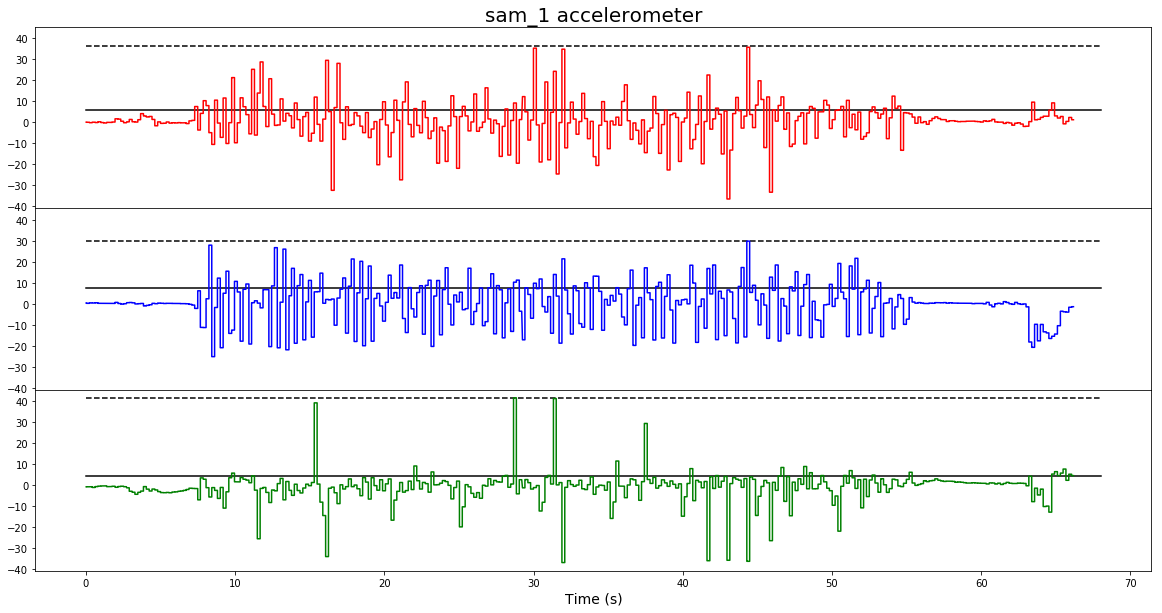

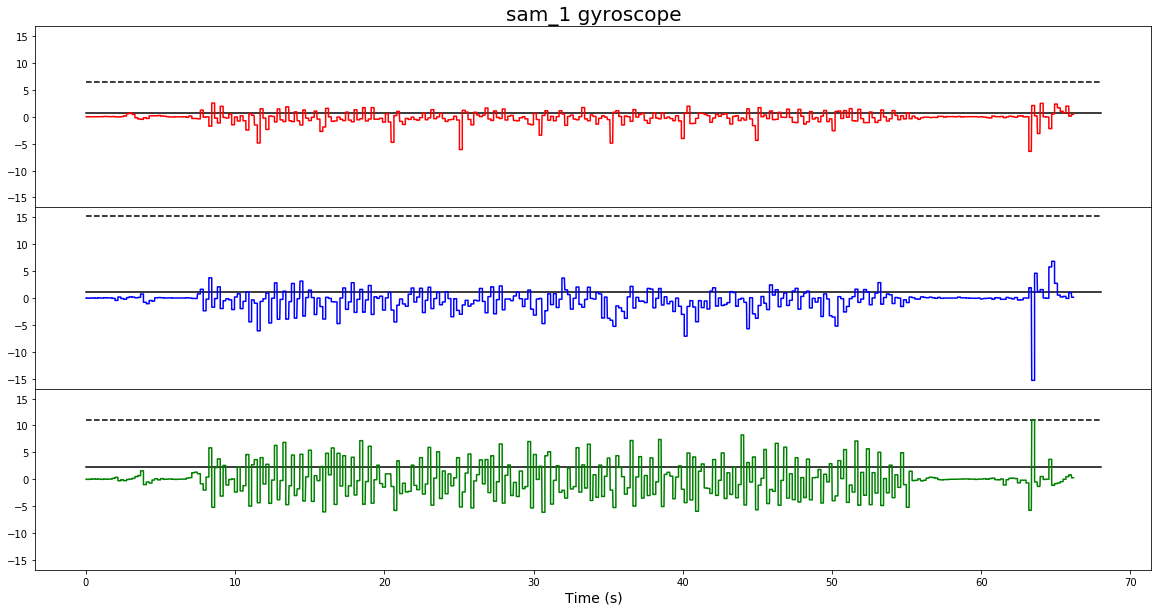

In [90]:
# plot sam_1
### ACC ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sam_1':
        ax1.plot((0,68),(row['ax'], row['ax']), 'k-')
        ax2.plot((0,68),(row['ay'], row['ay']), 'k-')
        ax3.plot((0,68),(row['az'], row['az']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sam_1':
        ax1.plot((0,68),(row['ax'], row['ax']), 'k--')
        ax2.plot((0,68),(row['ay'], row['ay']), 'k--')
        ax3.plot((0,68),(row['az'], row['az']), 'k--')

ax1.plot(sam_1['time'], sam_1['ax'], 'r-')
ax2.plot(sam_1['time'], sam_1['ay'], 'b-')
ax3.plot(sam_1['time'], sam_1['az'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('sam_1 accelerometer', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

### GYRO ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sam_1':
        ax1.plot((0,68),(row['wx'], row['wx']), 'k-')
        ax2.plot((0,68),(row['wy'], row['wy']), 'k-')
        ax3.plot((0,68),(row['wz'], row['wz']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sam_1':
        ax1.plot((0,68),(row['wx'], row['wx']), 'k--')
        ax2.plot((0,68),(row['wy'], row['wy']), 'k--')
        ax3.plot((0,68),(row['wz'], row['wz']), 'k--')

ax1.plot(sam_1['time'], sam_1['wx'], 'r-')
ax2.plot(sam_1['time'], sam_1['wy'], 'b-')
ax3.plot(sam_1['time'], sam_1['wz'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('sam_1 gyroscope', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

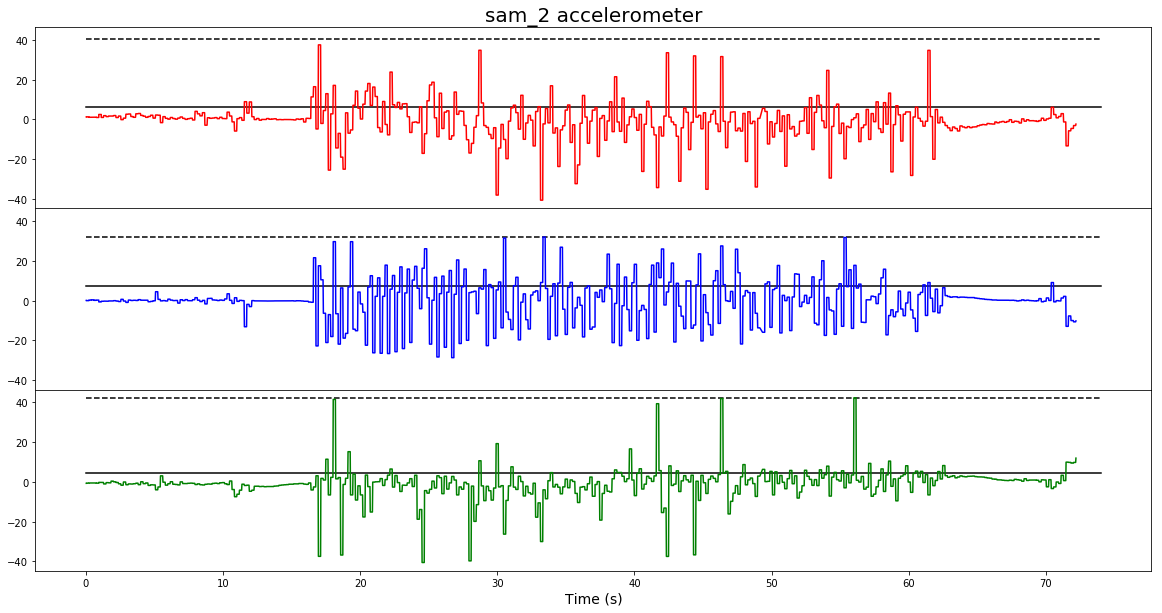

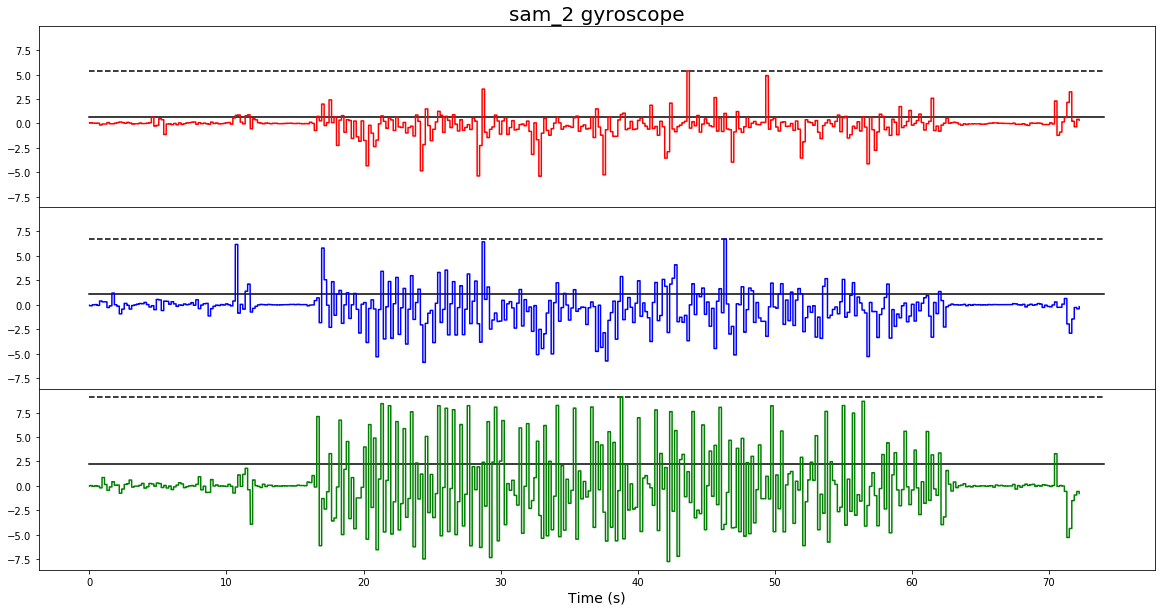

In [91]:
# plot sam_2
### ACC ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sam_2':
        ax1.plot((0,74),(row['ax'], row['ax']), 'k-')
        ax2.plot((0,74),(row['ay'], row['ay']), 'k-')
        ax3.plot((0,74),(row['az'], row['az']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sam_2':
        ax1.plot((0,74),(row['ax'], row['ax']), 'k--')
        ax2.plot((0,74),(row['ay'], row['ay']), 'k--')
        ax3.plot((0,74),(row['az'], row['az']), 'k--')

ax1.plot(sam_2['time'], sam_2['ax'], 'r-')
ax2.plot(sam_2['time'], sam_2['ay'], 'b-')
ax3.plot(sam_2['time'], sam_2['az'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('sam_2 accelerometer', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

### GYRO ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'sam_2':
        ax1.plot((0,74),(row['wx'], row['wx']), 'k-')
        ax2.plot((0,74),(row['wy'], row['wy']), 'k-')
        ax3.plot((0,74),(row['wz'], row['wz']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'sam_2':
        ax1.plot((0,74),(row['wx'], row['wx']), 'k--')
        ax2.plot((0,74),(row['wy'], row['wy']), 'k--')
        ax3.plot((0,74),(row['wz'], row['wz']), 'k--')

ax1.plot(sam_2['time'], sam_2['wx'], 'r-')
ax2.plot(sam_2['time'], sam_2['wy'], 'b-')
ax3.plot(sam_2['time'], sam_2['wz'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('sam_2 gyroscope', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()  

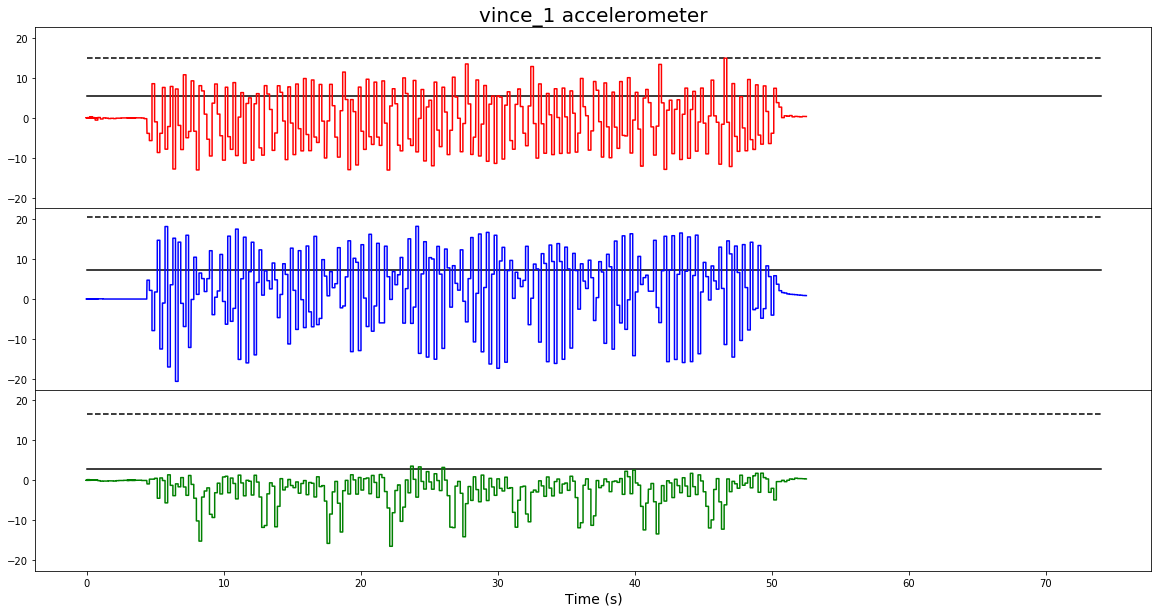

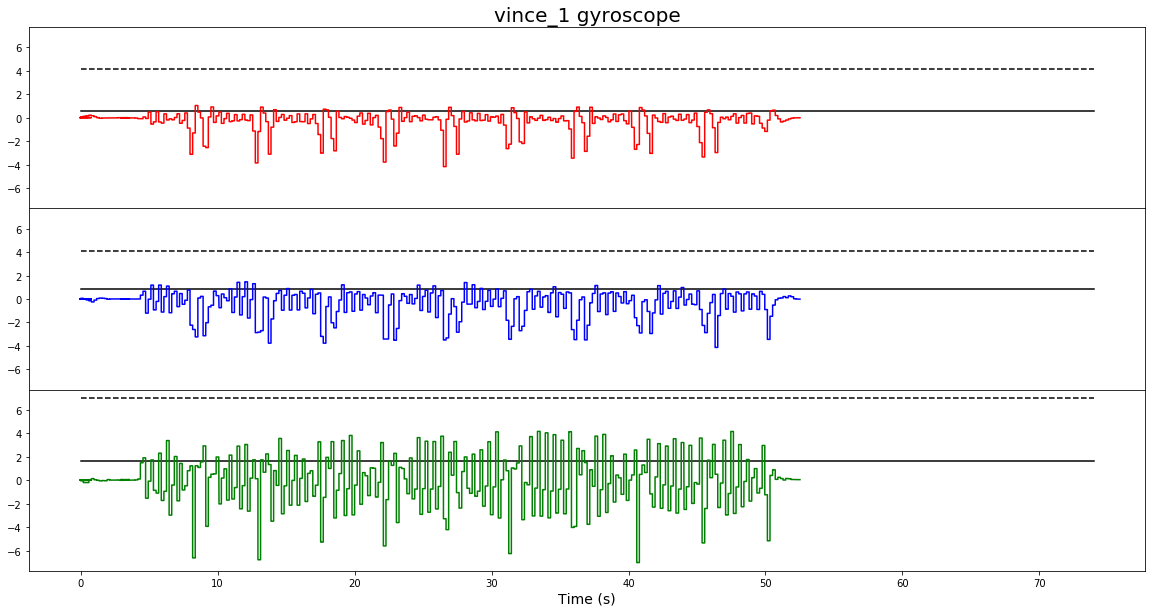

In [103]:
# plot vince_1
### ACC ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'vince_1':
        ax1.plot((0,74),(row['ax'], row['ax']), 'k-')
        ax2.plot((0,74),(row['ay'], row['ay']), 'k-')
        ax3.plot((0,74),(row['az'], row['az']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'vince_1':
        ax1.plot((0,74),(row['ax'], row['ax']), 'k--')
        ax2.plot((0,74),(row['ay'], row['ay']), 'k--')
        ax3.plot((0,74),(row['az'], row['az']), 'k--')

ax1.plot(vince_1['time'], vince_1['ax'], 'r-')
ax2.plot(vince_1['time'], vince_1['ay'], 'b-')
ax3.plot(vince_1['time'], vince_1['az'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('vince_1 accelerometer', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

### GYRO ###
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(20,10))

for idx, row in avg.iterrows():
    if idx == 'vince_1':
        ax1.plot((0,74),(row['wx'], row['wx']), 'k-')
        ax2.plot((0,74),(row['wy'], row['wy']), 'k-')
        ax3.plot((0,74),(row['wz'], row['wz']), 'k-')
    
for idx, row in maxs.iterrows():
    if idx == 'vince_1':
        ax1.plot((0,74),(row['wx'], row['wx']), 'k--')
        ax2.plot((0,74),(row['wy'], row['wy']), 'k--')
        ax3.plot((0,74),(row['wz'], row['wz']), 'k--')

ax1.plot(vince_1['time'], vince_1['wx'], 'r-')
ax2.plot(vince_1['time'], vince_1['wy'], 'b-')
ax3.plot(vince_1['time'], vince_1['wz'], 'g-')
# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

ax1.set_title('vince_1 gyroscope', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()  